In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fact_survey_responses = pd.read_csv("/content/drive/MyDrive/Datasets/fact_survey_responses.csv")
dim_repondents = pd.read_csv("/content/drive/MyDrive/Datasets/dim_repondents.csv")
dim_cities = pd.read_csv("/content/drive/MyDrive/Datasets/dim_cities.csv")

In [ ]:
merged_data = dim_repondents.merge(dim_cities, on='City_ID')  # joined dim_repondents with dim_cities on city_id

In [ ]:
merged_data_1 = dim_repondents.merge(fact_survey_responses, on='Respondent_ID') # joined dim_repondents with fact_survey_responses on Respondent_ID

**1) Who prefers energy drink more? (male/female/non-binary?**

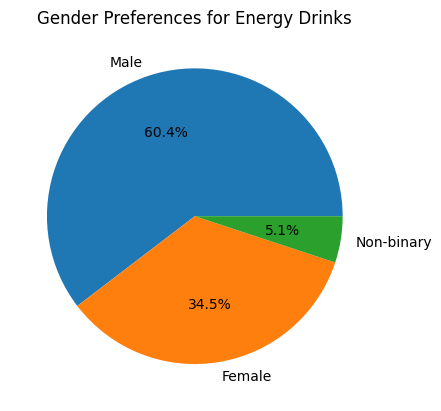

In [ ]:

# Grouping the data by Gender
gender_counts = merged_data['Gender'].value_counts()

# Calculating the percentage for each gender
total_respondents = len(merged_data)
gender_percentages = (gender_counts / total_respondents) * 100

# pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Preferences for Energy Drinks')

plt.show()

**2) Which age group prefers energy drinks more?**

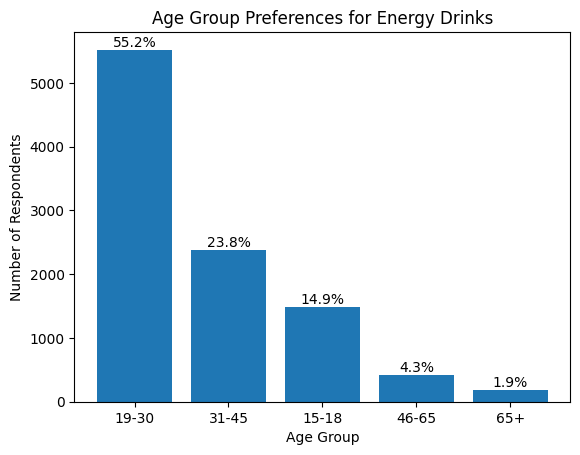

In [ ]:

result = merged_data.groupby('Age').size().reset_index(name='Preference_count')
result['Preference_percentage'] = round(result['Preference_count'] * 100.0 / result['Preference_count'].sum(), 2)
result = result.sort_values('Preference_count', ascending=False)

# bar chart
plt.bar(result['Age'], result['Preference_count'])
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.title('Age Group Preferences for Energy Drinks')

for i, count in enumerate(result['Preference_count']):
    percentage = result['Preference_percentage'].iloc[i]
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


**3) Which type of marketing reaches the most Youth (15-30)?**

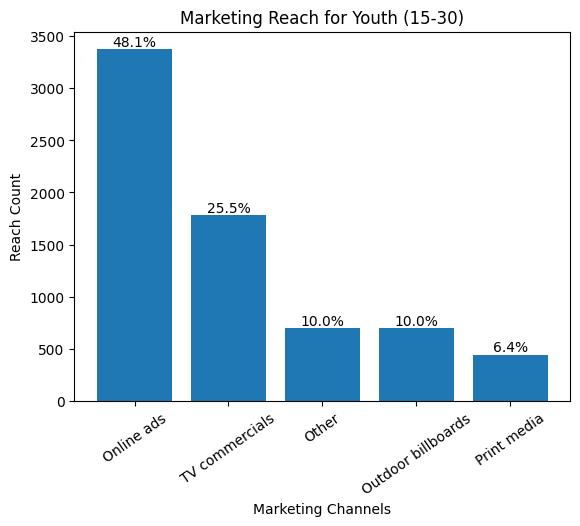

In [ ]:
youth_data = merged_data_1[merged_data_1['Age'].isin(['15-18', '19-30'])]


result = youth_data.groupby('Marketing_channels').size().reset_index(name='Reach_Count')
result['Preference_percentage'] = round(result['Reach_Count'] * 100.0 / result['Reach_Count'].sum(), 2)
result = result.sort_values('Reach_Count', ascending=False)

# bar chart
plt.bar(result['Marketing_channels'], result['Reach_Count'])
plt.xlabel('Marketing Channels')
plt.ylabel('Reach Count')
plt.title('Marketing Reach for Youth (15-30)')

for i, count in enumerate(result['Reach_Count']):
    percentage = result['Preference_percentage'].iloc[i]
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=35)

plt.show()

**1) What are the preferred ingredients of energy drinks among respondents**

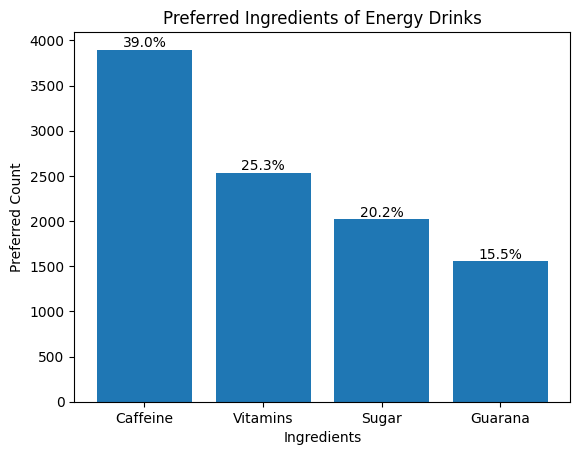

In [ ]:
result = fact_survey_responses['Ingredients_expected'].value_counts().reset_index()
result.columns = ['Ingredients_expected', 'Preferred_count']
result = result.sort_values('Preferred_count', ascending=False)

total_count = result['Preferred_count'].sum()
result['Percentage'] = (result['Preferred_count'] / total_count) * 100

plt.bar(result['Ingredients_expected'], result['Preferred_count'])
plt.xlabel('Ingredients')
plt.ylabel('Preferred Count')
plt.title('Preferred Ingredients of Energy Drinks')

for i, count in enumerate(result['Preferred_count']):
    percentage = result['Percentage'].iloc[i]
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')


plt.show()

**2)What packaging preferences do respondents have for energy drinks?**

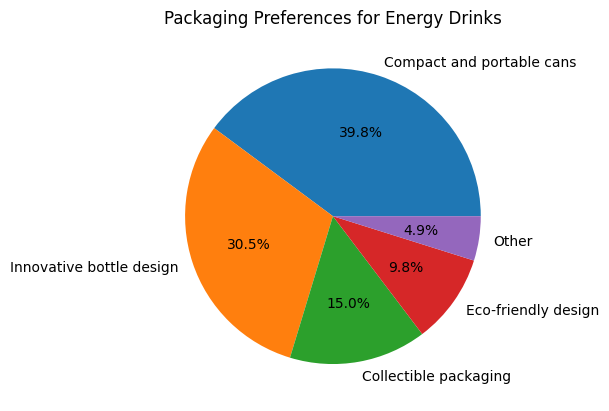

In [ ]:
result = fact_survey_responses['Packaging_preference'].value_counts().reset_index()
result.columns = ['Packaging_preference', 'Preferred_count']
result = result.sort_values('Preferred_count', ascending=False)

# Create a pie chart to visualize the packaging preferences of energy drinks
plt.pie(result['Preferred_count'], labels=result['Packaging_preference'], autopct='%1.1f%%')
plt.title('Packaging Preferences for Energy Drinks')

plt.show()

**1) Who are the current market leaders**

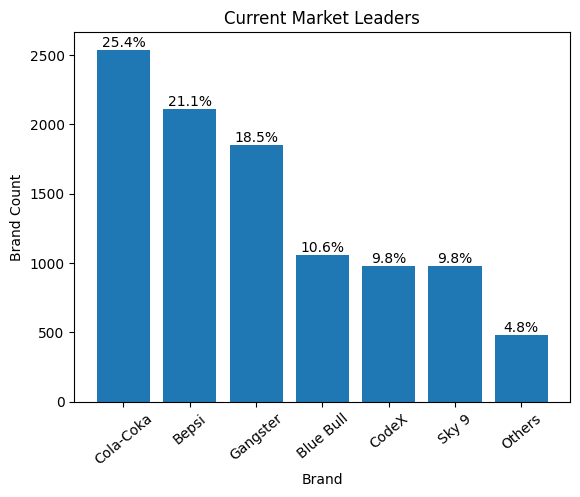

In [ ]:
result = fact_survey_responses['Current_brands'].value_counts().reset_index()
result.columns = ['Brand', 'Brand_Count']
result = result.sort_values('Brand_Count', ascending=False)

total_count = result['Brand_Count'].sum()
result['Percentage'] = (result['Brand_Count'] / total_count) * 100

plt.bar(result['Brand'], result['Brand_Count'])
plt.xlabel('Brand')
plt.ylabel('Brand Count')
plt.title('Current Market Leaders')

for i, count in enumerate(result['Brand_Count']):
    percentage = result['Percentage'].iloc[i]
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=40)

plt.show()

**2) What are the primary reasons consumers prefer those brands over ours?**

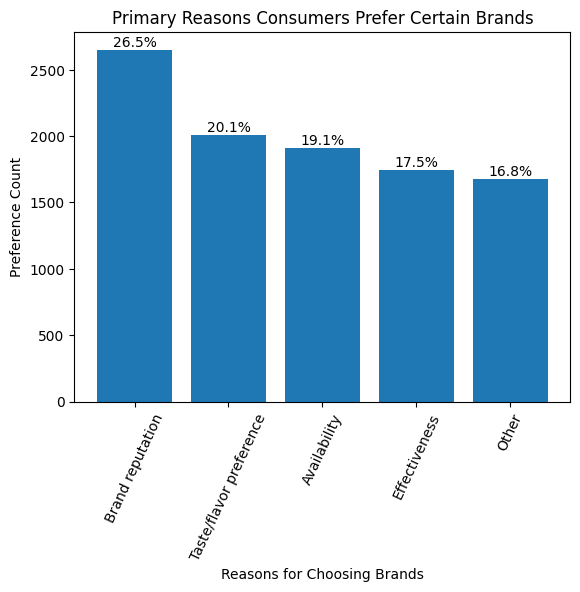

In [ ]:
result = fact_survey_responses['Reasons_for_choosing_brands'].value_counts().reset_index()
result.columns = ['Reasons_for_choosing_brands', 'Preference_Count']
result = result.sort_values('Preference_Count', ascending=False)

total_count = result['Preference_Count'].sum()
result['Percentage'] = (result['Preference_Count'] / total_count) * 100

plt.bar(result['Reasons_for_choosing_brands'], result['Preference_Count'])
plt.xlabel('Reasons for Choosing Brands')
plt.ylabel('Preference Count')
plt.title('Primary Reasons Consumers Prefer Certain Brands')

for i, count in enumerate(result['Preference_Count']):
    percentage = result['Percentage'].iloc[i]
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=65)

plt.show()

**1) Which marketing channel can be used to reach more customers**

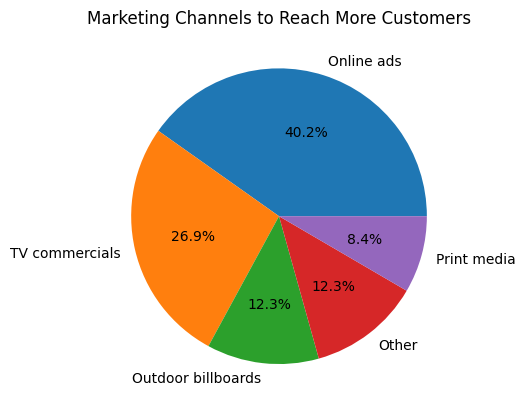

In [ ]:
result = fact_survey_responses['Marketing_channels'].value_counts().reset_index()
result.columns = ['Marketing_channels', 'Reach_Count']
result = result.sort_values('Reach_Count', ascending=False)

plt.pie(result['Reach_Count'], labels=result['Marketing_channels'], autopct='%1.1f%%')
plt.title('Marketing Channels to Reach More Customers')

plt.show()

**2) How effective are different marketing strategies and channels in reaching our customers?**

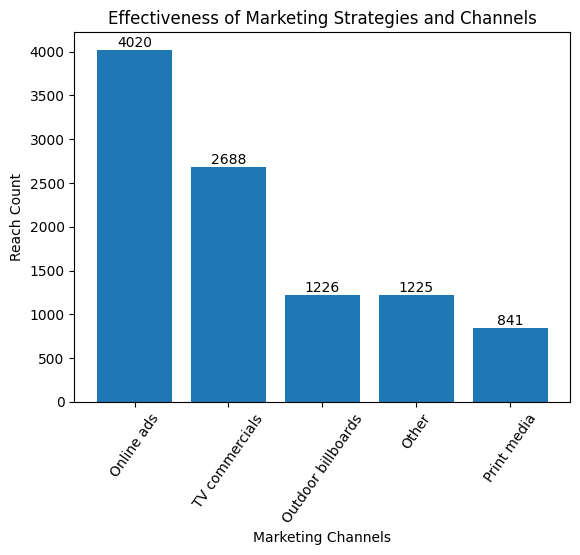

In [ ]:

result = fact_survey_responses['Marketing_channels'].value_counts().reset_index()
result.columns = ['Marketing_channels', 'Reach_Count']
result = result.sort_values('Reach_Count', ascending=False)

# Create a bar chart to visualize the effectiveness of marketing strategies and channels
plt.bar(result['Marketing_channels'], result['Reach_Count'])
plt.xlabel('Marketing Channels')
plt.ylabel('Reach Count')
plt.title('Effectiveness of Marketing Strategies and Channels')

# Add the count values on top of each bar
for i, count in enumerate(result['Reach_Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=55)  # Rotate x-axis labels for better visibility

plt.show()

**1) What do people think about our brand? (overall rating)**

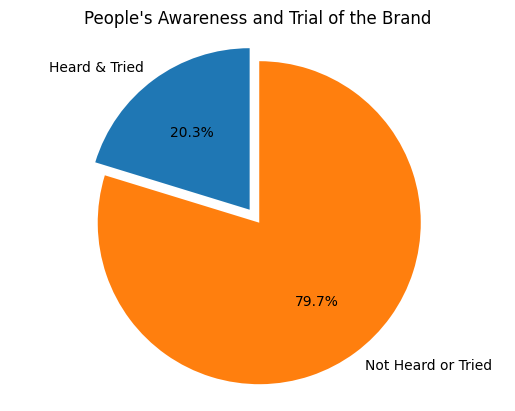

In [ ]:
heard_and_tried_count = len(fact_survey_responses[(fact_survey_responses['Heard_before'] == 'Yes') &
                                                  (fact_survey_responses['Tried_before'] == 'Yes')])

not_heard_or_tried_count = 10000 - heard_and_tried_count

labels = ['Heard & Tried', 'Not Heard or Tried']
sizes = [heard_and_tried_count, not_heard_or_tried_count]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('People\'s Awareness and Trial of the Brand')

plt.show()

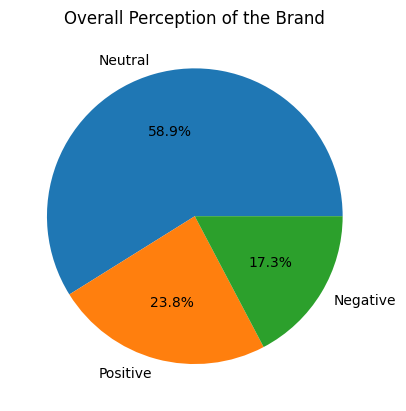

In [ ]:


# Filter the data based on the given conditions
filtered_data = fact_survey_responses[(fact_survey_responses['Current_brands'] == 'CodeX') &
                                      (fact_survey_responses['Heard_before'] == 'Yes') &
                                      (fact_survey_responses['Tried_before'] == 'Yes')]

# Perform the SQL-like operations using pandas
result = filtered_data['Brand_perception'].value_counts().reset_index()
result.columns = ['Brand_perception', 'Perception_Count']
result = result.sort_values('Perception_Count', ascending=False)
result['Percentage_Contribution'] = result['Perception_Count'] * 100.0 / result['Perception_Count'].sum()

# Create a pie chart to visualize the overall perception of the brand
plt.pie(result['Perception_Count'], labels=result['Brand_perception'], autopct='%1.1f%%')
plt.title('Overall Perception of the Brand')

plt.show()


**2)  Which cities do we need to focus more on?**

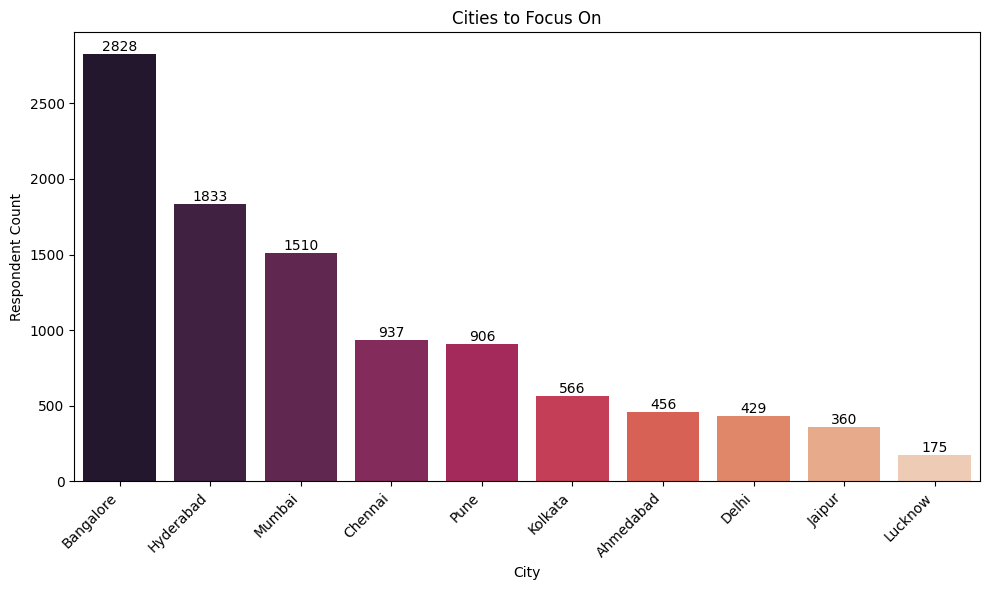

In [ ]:

result = merged_data['City'].value_counts().reset_index()
result.columns = ['City', 'Respondent_Count']
result = result.sort_values('Respondent_Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='City', y='Respondent_Count', palette='rocket')
plt.xlabel('City')
plt.ylabel('Respondent Count')
plt.title('Cities to Focus On')

plt.xticks(rotation=45, ha='right')

for i, count in enumerate(result['Respondent_Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


**1) Where do respondents prefer to purchase energy drinks**

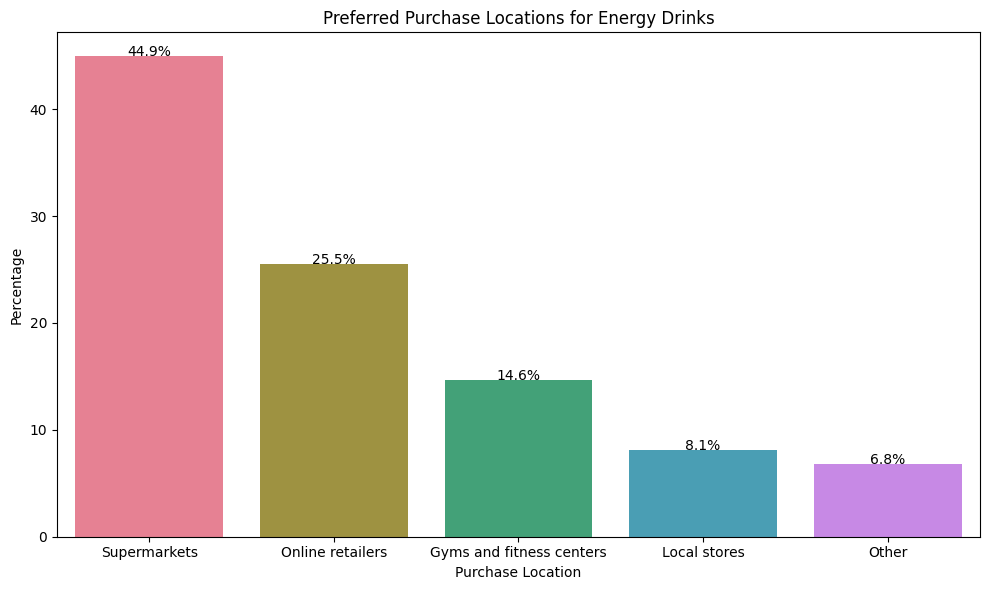

In [ ]:

result = fact_survey_responses['Purchase_location'].value_counts().reset_index()
result.columns = ['Purchase_location', 'Preferred_Location_count']
result = result.sort_values('Preferred_Location_count', ascending=False)

total_count = result['Preferred_Location_count'].sum()
result['Percentage'] = (result['Preferred_Location_count'] / total_count) * 100

plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(result))
sns.barplot(data=result, x='Purchase_location', y='Percentage', palette=colors)

for i, percentage in enumerate(result['Percentage']):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center')

plt.xlabel('Purchase Location')
plt.ylabel('Percentage')
plt.title('Preferred Purchase Locations for Energy Drinks')

plt.tight_layout()
plt.show()


**2)What are the typical consumption situations for energy drinks among respondents?**

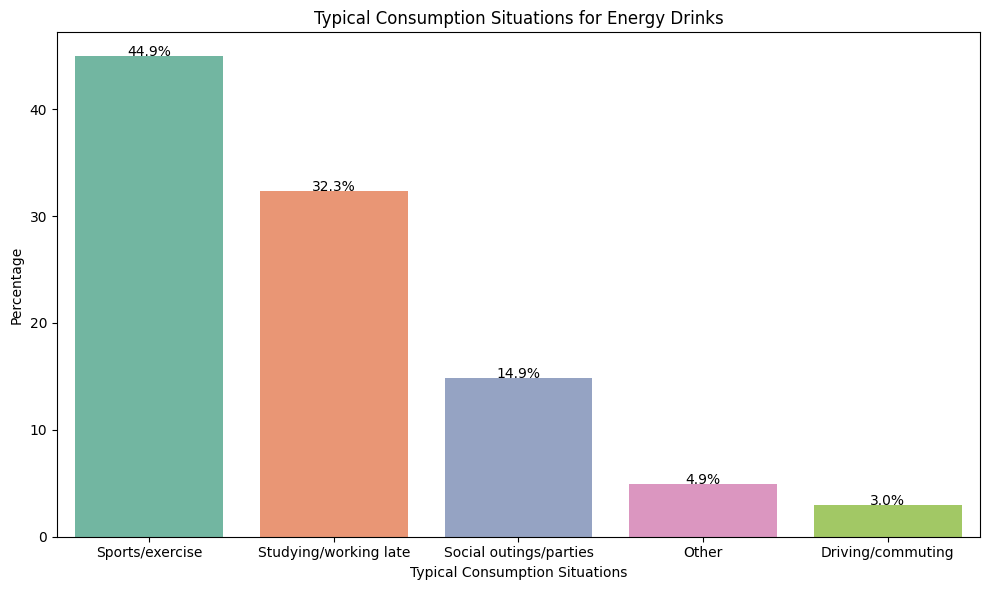

In [ ]:

result = fact_survey_responses['Typical_consumption_situations'].value_counts().reset_index()
result.columns = ['Typical_consumption_situations', 'Preferred_situation_count']
result = result.sort_values('Preferred_situation_count', ascending=False)

total_count = result['Preferred_situation_count'].sum()
result['Percentage'] = (result['Preferred_situation_count'] / total_count) * 100

plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', len(result))
sns.barplot(data=result, x='Typical_consumption_situations', y='Percentage', palette=colors)

for i, percentage in enumerate(result['Percentage']):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center')

plt.xlabel('Typical Consumption Situations')
plt.ylabel('Percentage')
plt.title('Typical Consumption Situations for Energy Drinks')


plt.tight_layout()
plt.show()


**3)What factors influence respondents' purchase decisions, such as price range and limited edition packaging?**

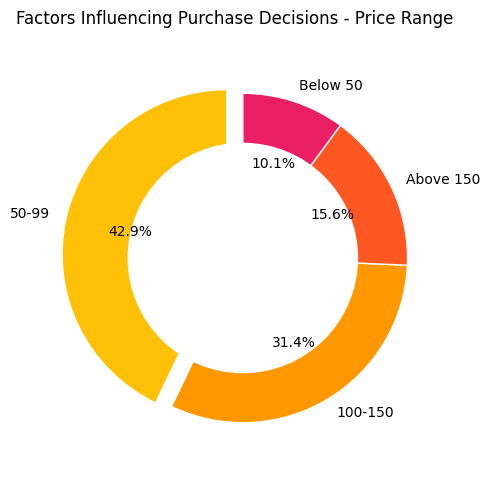

In [ ]:


result = fact_survey_responses['Price_range'].value_counts().reset_index()
result.columns = ['Price_range', 'Respondent_Count']
result = result.sort_values('Respondent_Count', ascending=False)

plt.figure(figsize=(5,5))
colors = ['#FFC107', '#FF9800', '#FF5722', '#E91E63', '#9C27B0']
explode = [0.1] + [0] * (len(result) - 1)  # Explode the first slice (optional)
plt.pie(result['Respondent_Count'], labels=result['Price_range'], colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1})

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Factors Influencing Purchase Decisions - Price Range')

plt.axis('equal')
plt.tight_layout()
plt.show()


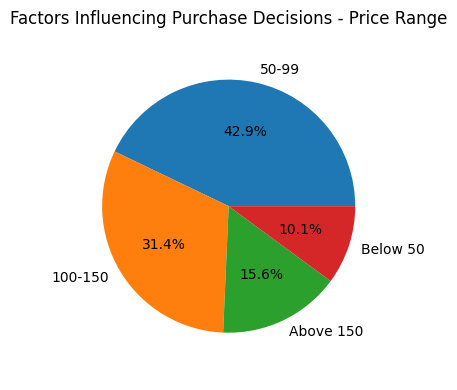

In [ ]:

# Perform the SQL-like operations using pandas
result = fact_survey_responses['Price_range'].value_counts().reset_index()
result.columns = ['Price_range', 'Respondent_Count']
result = result.sort_values('Respondent_Count', ascending=False)

# Create a pie chart to visualize the factors influencing purchase decisions
plt.figure(figsize=(4,4))
plt.pie(result['Respondent_Count'], labels=result['Price_range'], autopct='%1.1f%%')

plt.title('Factors Influencing Purchase Decisions - Price Range')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


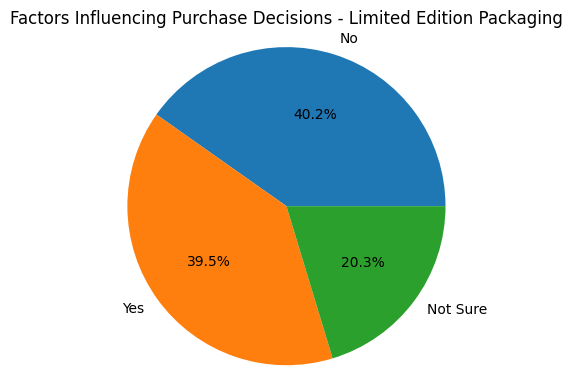

In [ ]:

result = fact_survey_responses['Limited_edition_packaging'].value_counts().reset_index()
result.columns = ['Limited_edition_packaging', 'Respondent_Count']
result = result.sort_values('Respondent_Count', ascending=False)

plt.figure(figsize=(4,4))
plt.pie(result['Respondent_Count'], labels=result['Limited_edition_packaging'], autopct='%1.1f%%')

plt.title('Factors Influencing Purchase Decisions - Limited Edition Packaging')

plt.axis('equal')
plt.tight_layout()
plt.show()


**1)Which area of business should we focus more on our product development(Branding/taste/availability)**

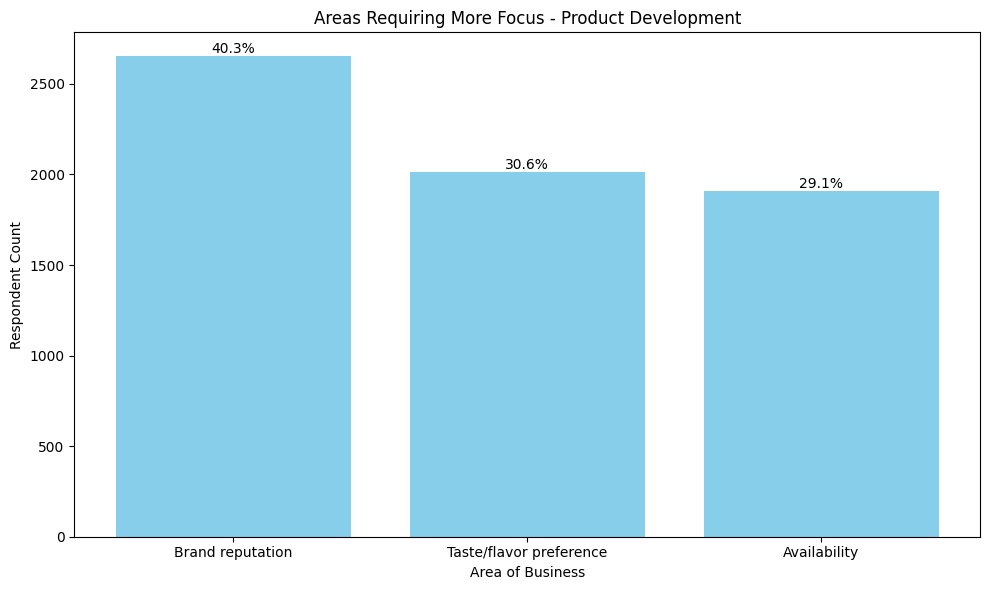

In [ ]:

result = fact_survey_responses.groupby('Reasons_for_choosing_brands').size().reset_index(name='Respondent_count')
result = result[result['Reasons_for_choosing_brands'].isin(['Brand reputation', 'Taste/flavor preference', 'Availability'])]
result = result.sort_values('Respondent_count', ascending=False)

total_count = result['Respondent_count'].sum()
result['Percentage'] = (result['Respondent_count'] / total_count) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(result['Reasons_for_choosing_brands'], result['Respondent_count'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Area of Business')
plt.ylabel('Respondent Count')
plt.title('Areas Requiring More Focus - Product Development')

plt.tight_layout()
plt.show()


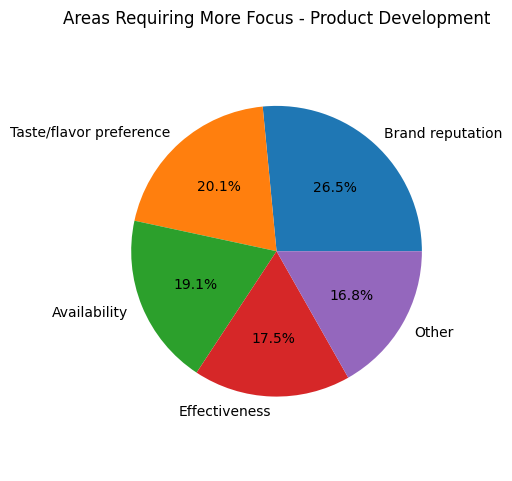

In [ ]:


result = fact_survey_responses.groupby('Reasons_for_choosing_brands').size().reset_index(name='Respondent_count')
result = result.sort_values('Respondent_count', ascending=False)

plt.figure(figsize=(5,5))
plt.pie(result['Respondent_count'], labels=result['Reasons_for_choosing_brands'], autopct='%1.1f%%')

plt.title('Areas Requiring More Focus - Product Development')

plt.axis('equal')

plt.tight_layout()
plt.show()


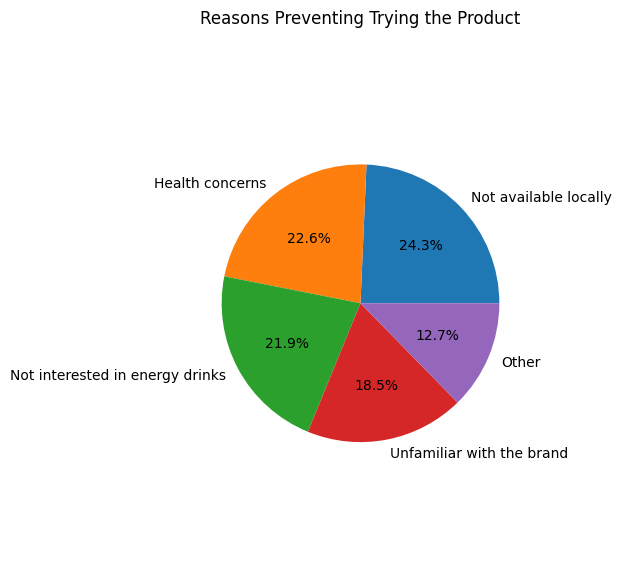

In [ ]:


result = fact_survey_responses.groupby('Reasons_preventing_trying').size().reset_index(name='Respondent_count')
result = result.sort_values('Respondent_count', ascending=False)

plt.figure(figsize=(6,6))
plt.pie(result['Respondent_count'], labels=result['Reasons_preventing_trying'], autopct='%1.1f%%')

plt.title('Reasons Preventing Trying the Product')

plt.axis('equal')

plt.tight_layout()
plt.show()
